In [1]:
!pip install pandas_datareader
!pip install tensorflow

In [2]:
from pandas_datareader import data
import math
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import random as rnd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [3]:
rnd.seed(123)
tf.random.set_seed(1234)
plt.style.use("fivethirtyeight")

In [4]:
apple = data.DataReader("AAPL",start = "2016-6-1", end = "2021-6-1",data_source = "yahoo")
google = data.DataReader("GOOG",start = "2016-6-1", end = "2021-6-1",data_source = "yahoo")
ibm = data.DataReader("IBM",start = "2016-6-1", end = "2021-6-1",data_source = "yahoo")

In [5]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-01,24.885000,24.582500,24.754999,24.615000,116693200.0,22.960564
2016-06-02,24.459999,24.157499,24.400000,24.430000,160766400.0,22.787996
2016-06-03,24.567499,24.362499,24.447500,24.480000,114019600.0,22.834635
2016-06-06,25.472500,24.387501,24.497499,24.657499,93170000.0,23.000208
2016-06-07,24.967501,24.740000,24.812500,24.757500,89638000.0,23.093483


In [6]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-01,737.210022,730.659973,734.530029,734.150024,1253600,734.150024
2016-06-02,733.020020,724.169983,732.500000,730.400024,1341800,730.400024
2016-06-03,729.489990,720.559998,729.270020,722.340027,1226300,722.340027
2016-06-06,724.909973,714.609985,724.909973,716.549988,1565300,716.549988
2016-06-07,721.979980,716.549988,719.840027,716.650024,1336200,716.650024


In [7]:
ibm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-01,153.270004,151.539993,153.000000,152.509995,2663400.0,122.114479
2016-06-02,153.500000,152.119995,152.589996,153.500000,2642600.0,122.907143
2016-06-03,153.039993,151.699997,152.399994,152.889999,2328300.0,122.418724
2016-06-06,153.949997,152.339996,153.089996,152.729996,2378700.0,122.290611
2016-06-07,153.929993,152.660004,153.309998,153.330002,4465000.0,122.771080


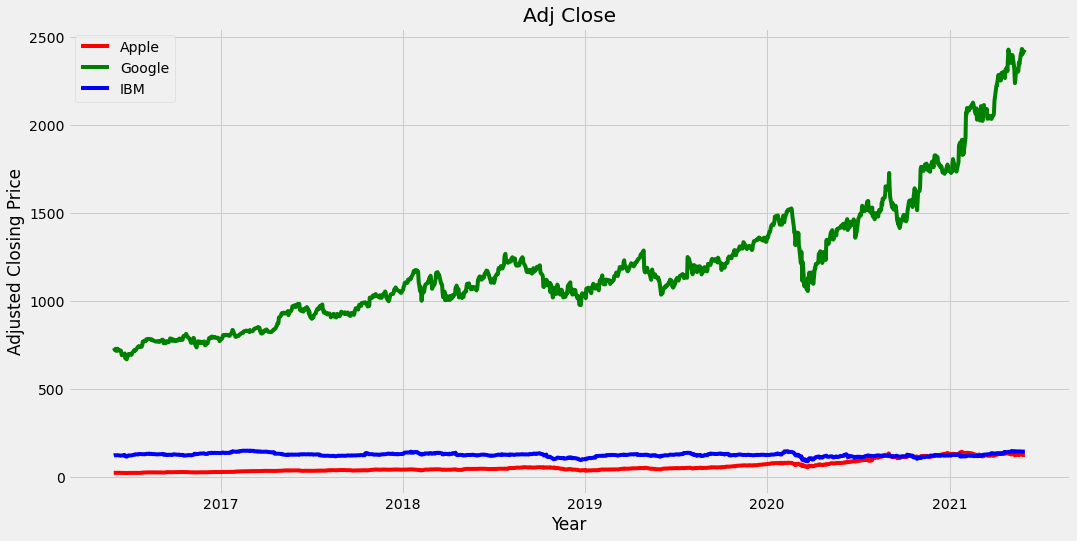

In [8]:
plt.figure(figsize = (16,8))
plt.plot(apple["Adj Close"],color = "r",label = "Apple")
plt.plot(google["Adj Close"],color = "g",label = "Google")
plt.plot(ibm["Adj Close"],color = "b",label = "IBM")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Adjusted Closing Price")
plt.title("Adj Close")
plt.show()

# Pre-processing the data

In [9]:
# Selecting the target feature
apple_data = apple["Adj Close"]
google_data = google["Adj Close"]
ibm_data = ibm["Adj Close"]

In [10]:
# Separating the data into 80% training and 20% testing data
A_training_data = apple_data[0:int(len(apple_data)*0.8)]
G_training_data = google_data[0:int(len(google_data)*0.8)]
I_training_data = ibm_data[0:int(len(ibm_data)*0.8)]

In [11]:
# Scaling the data
A_scale = MinMaxScaler().fit(A_training_data.values.reshape(-1,1))
A_scale_training_data = A_scale.transform(A_training_data.values.reshape(-1,1))

G_scale = MinMaxScaler().fit(G_training_data.values.reshape(-1,1))
G_scale_training_data = G_scale.transform(G_training_data.values.reshape(-1,1))

I_scale = MinMaxScaler().fit(I_training_data.values.reshape(-1,1))
I_scale_training_data = I_scale.transform(I_training_data.values.reshape(-1,1))

In [12]:
# Spliting into X & Y for Apple
A_X = []
A_Y = []

for i in range(len(A_scale_training_data)-8):
    A_X.append(A_scale_training_data[i:i+8,0])
    A_Y.append(A_scale_training_data[i+8,0])
A_x = np.array(A_X)
A_y = np.array(A_Y)
A_X_train = A_x[:int(A_x.shape[0]*0.8)]
A_X_test = A_x[int(A_x.shape[0]*0.8):]

A_Y_train = A_y[:int(A_y.shape[0]*0.8)]
A_Y_test = A_y[int(A_y.shape[0]*0.8):]

In [13]:
# Spliting into X & Y for Google
G_X = []
G_Y = []

for i in range(len(G_scale_training_data)-8):
    G_X.append(G_scale_training_data[i:i+8,0])
    G_Y.append(G_scale_training_data[i+8,0])
G_x = np.array(G_X)
G_y = np.array(G_Y)
G_X_train = G_x[:int(G_x.shape[0]*0.8)]
G_X_test = G_x[int(G_x.shape[0]*0.8):]

G_Y_train = G_y[:int(G_y.shape[0]*0.8)]
G_Y_test = G_y[int(G_y.shape[0]*0.8):]

In [14]:
# Spliting into X & Y for IBM
I_X = []
I_Y = []

for i in range(len(I_scale_training_data)-8):
    I_X.append(I_scale_training_data[i:i+8,0])
    I_Y.append(I_scale_training_data[i+8,0])
I_x = np.array(I_X)
I_y = np.array(I_Y)
I_X_train = I_x[:int(I_x.shape[0]*0.8)]
I_X_test = I_x[int(I_x.shape[0]*0.8):]

I_Y_train = I_y[:int(I_y.shape[0]*0.8)]
I_Y_test = I_y[int(I_y.shape[0]*0.8):]

In [15]:
# Re-Shaping the dateset for Apple
A_X_train = A_X_train.reshape((A_X_train.shape[0],A_X_train.shape[1],1))
A_X_test = A_X_test.reshape((A_X_test.shape[0],A_X_test.shape[1],1))

# Re-Shaping the dateset for Gogle
G_X_train = G_X_train.reshape((G_X_train.shape[0],G_X_train.shape[1],1))
G_X_test = G_X_test.reshape((G_X_test.shape[0],G_X_test.shape[1],1))

# Re-Shaping the dateset for IBM
I_X_train = I_X_train.reshape((I_X_train.shape[0],I_X_train.shape[1],1))
I_X_test = I_X_test.reshape((I_X_test.shape[0],I_X_test.shape[1],1))

# Creating LSTM (Long Short-Term Memory) network model

In [16]:
# Apple
A_mdl = Sequential()
A_mdl.add(LSTM(256, return_sequences = True,input_shape = (8,1)))
A_mdl.add(LSTM(128, return_sequences = False))
A_mdl.add(Dense(50))
A_mdl.add(Dense(1))
A_mdl.compile(optimizer = "adam",loss = "mse" )

# Google
G_mdl = Sequential()
G_mdl.add(LSTM(256, return_sequences = True,input_shape = (8,1)))
G_mdl.add(LSTM(128, return_sequences = False))
G_mdl.add(Dense(50))
G_mdl.add(Dense(1))
G_mdl.compile(optimizer = "adam",loss = "mse" )

# IBM
I_mdl = Sequential()
I_mdl.add(LSTM(256, return_sequences = True,input_shape = (8,1)))
I_mdl.add(LSTM(128, return_sequences = False))
I_mdl.add(Dense(50))
I_mdl.add(Dense(1))
I_mdl.compile(optimizer = "adam",loss = "mse" )

In [17]:
A_mdl.fit(A_X_train, A_Y_train,batch_size = 1, epochs = 1)

G_mdl.fit(G_X_train, G_Y_train,batch_size = 1, epochs = 1)

I_mdl.fit(I_X_train, I_Y_train,batch_size = 1, epochs = 1)

799/799 [==============================] - 12s 12ms/step - loss: 0.0197


In [18]:
# Predicting the training data
A_train_predict = A_mdl.predict(A_X_train)

G_train_predict = G_mdl.predict(G_X_train)

I_train_predict = I_mdl.predict(I_X_train)

# Predicting the testing data
A_test_predict = A_mdl.predict(A_X_test)
A_pred = A_scale.inverse_transform(A_test_predict)

G_test_predict = G_mdl.predict(G_X_test)
G_pred = G_scale.inverse_transform(G_test_predict)

I_test_predict = I_mdl.predict(I_X_test)
I_pred = I_scale.inverse_transform(I_test_predict)

# Comparing Actual Vs Predicted Results

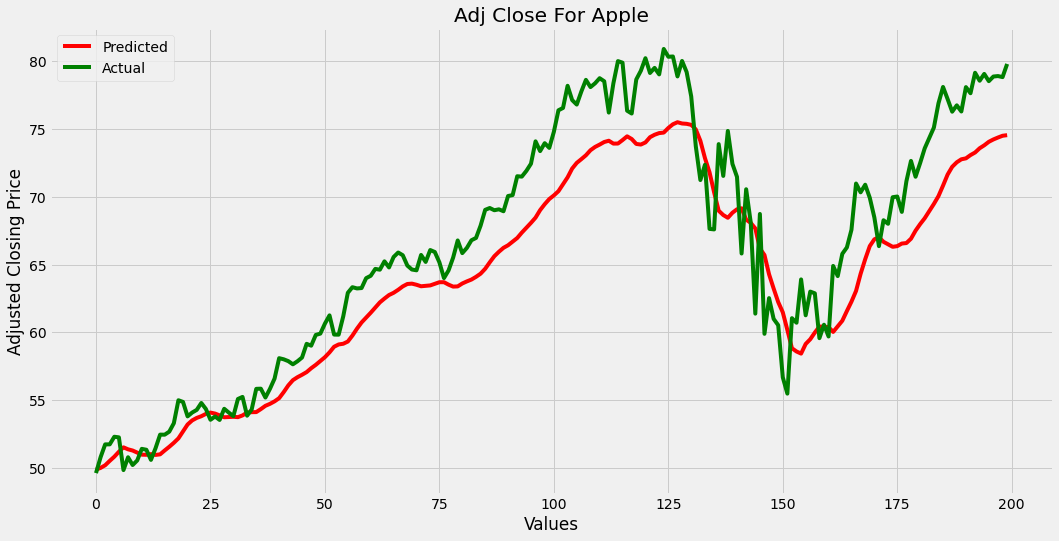

In [19]:
# Plotting predicted Vs Actual Results for Apple
plt.figure(figsize = (16,8))
plt.plot(A_pred,color = "r",label = "Predicted")
plt.plot(A_scale.inverse_transform(A_Y_test.reshape(-1,1)),color = "g",label = "Actual")
plt.legend()
plt.xlabel("Values")
plt.ylabel("Adjusted Closing Price")
plt.title("Adj Close For Apple")
plt.show()

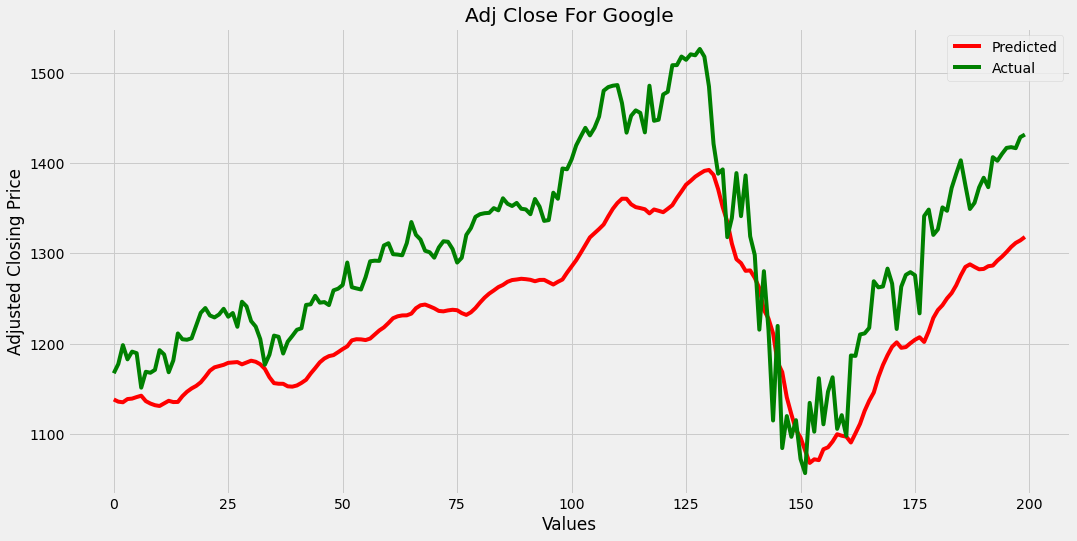

In [20]:
# Plotting predicted Vs Actual Results for Google
plt.figure(figsize = (16,8))
plt.plot(G_pred,color = "r",label = "Predicted")
plt.plot(G_scale.inverse_transform(G_Y_test.reshape(-1,1)),color = "g",label = "Actual")
plt.legend()
plt.xlabel("Values")
plt.ylabel("Adjusted Closing Price")
plt.title("Adj Close For Google")
plt.show()

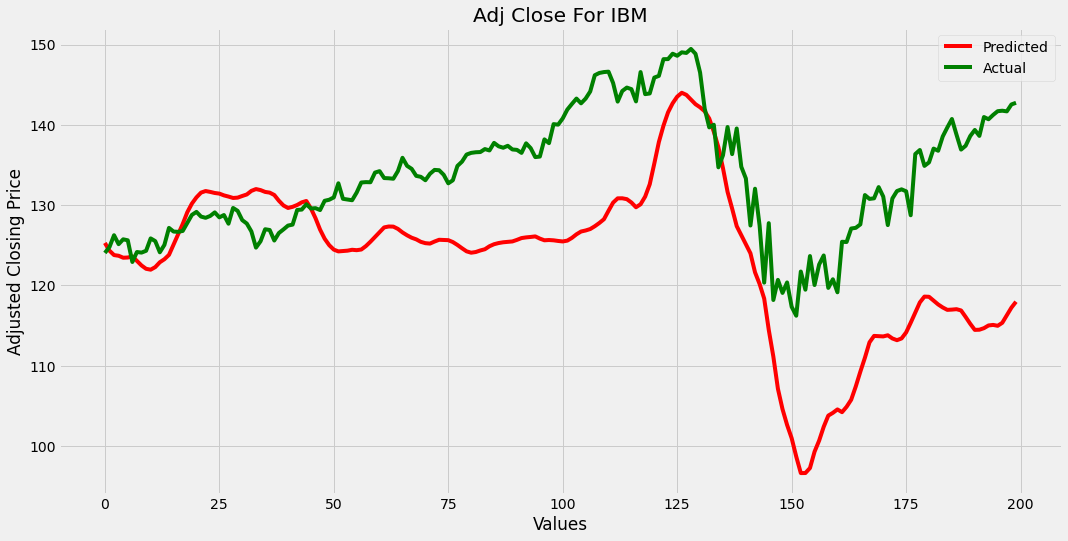

In [21]:
# Plotting predicted Vs Actual Results for IBM
plt.figure(figsize = (16,8))
plt.plot(I_pred,color = "r",label = "Predicted")
plt.plot(I_scale.inverse_transform(G_Y_test.reshape(-1,1)),color = "g",label = "Actual")
plt.legend()
plt.xlabel("Values")
plt.ylabel("Adjusted Closing Price")
plt.title("Adj Close For IBM")
plt.show()